In [1]:
import re
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('C:\Users\Abraham\Desktop\UT\MSBA\Python\HW\NYC_Restaurants.csv', dtype=unicode)

# Q1

In [3]:
#Combine four columns into one new column, separated by spaces
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE']

#Print first 10 rows of the new column
print df.loc[:9,'RESTAURANT']

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


# Q2

In [4]:
#Create new dataframe with only three columns and drop duplicates to get unique restaurant locations
df_store = df[['DBA','BORO','RESTAURANT']].drop_duplicates()

#Reset index numbers
df_store = df_store.reset_index()

#The length of this dataframe is the number of unique restaurants
len(df_store)

10114

# Q3

In [5]:
#Dictionary to store number 
chain_dt = {}

#For each unique restaurant, df_chain will mask using only that restuarant name
#If there are multiple rows (locations) then this restaurant is a chain

for store in df_store['DBA'].unique():
    df_chain = df_store[df_store['DBA'] == store]

    if len(df_chain) > 1:
        chain_dt[store] = len(df_chain)

len(chain_dt)

368

# Q4

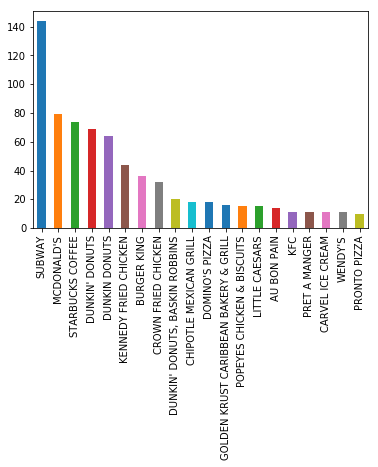

In [6]:
#Convert to series and plot the top 20 largest chains
Series(chain_dt).sort_values(ascending = False)[0:20].plot(kind='bar')

# Q5

In [7]:
total_chains = 0

#For each individual store, check if the DBA is in the chain dictionary
#If yes then add to the counter

for store in df_store['RESTAURANT']:
    df_chain = df_store[df_store['RESTAURANT'] == store]
    
    name = df_chain.iloc[0]['DBA']
    
    if name in chain_dt.keys():
        total_chains += 1


total_chains/float(len(df_store)) * 100

# 16.47% of all restaurants are chains

16.47221672928614

# Q6

{'BRONX': 659, 'BROOKLYN': 2180, 'STATEN ISLAND': 312, 'MANHATTAN': 3323, 'QUEENS': 1968}


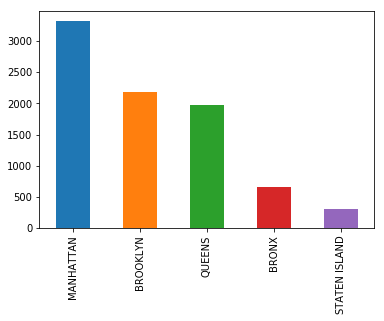

In [8]:
#Dictionary to store {boroughs:number of independent restaurants}
boro_dt = {}

#For each individual store, if it is not a chain, add it to that borough's counter in the dictionary

for store in df_store['RESTAURANT']:
    df_temp = df_store[df_store['RESTAURANT'] == store]

    if df_temp.iloc[0]['DBA'] not in chain_dt.keys():
        
        boro = df_temp.iloc[0]['BORO']        
        if boro != 'Missing':
            if boro in boro_dt.keys():
                boro_dt[boro] += 1
                
            #If the borough is not in the dictionary yet, set the counter to 1
            else:
                boro_dt[boro] = 1
        
print boro_dt
Series(boro_dt).sort_values(ascending = False).plot(kind='Bar')


# Q7

               Independents  Totals  Percentages
BRONX                   659     855     0.770760
BROOKLYN               2180    2529     0.862001
MANHATTAN              3323    4001     0.830542
QUEENS                 1968    2321     0.847910
STATEN ISLAND           312     394     0.791878


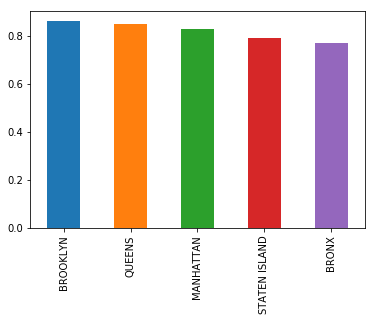

In [9]:
#Count the total number of stores in each borough, store in a series boro_totals
boro_totals = df_store['BORO'].value_counts()
boro_totals = boro_totals.drop(labels ='Missing')

#Create new dataframe from the dictionary in Q6 that has the counts of independent restaurants
df_boro = DataFrame(Series(boro_dt), columns = ['Independents'])

#Bring the totals in as a new column
df_boro['Totals'] = boro_totals

#Calculate percentages and show
df_boro['Percentages'] = df_boro['Independents']/df_boro['Totals']

print df_boro
df_boro['Percentages'].sort_values(ascending = False).plot(kind='Bar')

The borough with the most independent restaurants (Manhattan) is not the one with the highest ratio of independent restaurants (Brooklyn).

# Q8

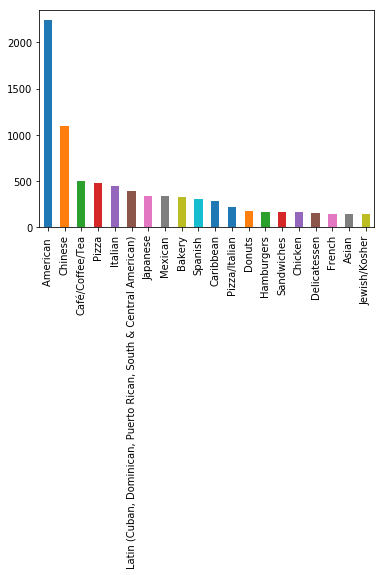

In [10]:
#Create new dataframe with these three columns
df_cuisine = df[['CUISINE DESCRIPTION','RESTAURANT','VIOLATION CODE']].drop_duplicates()
df_cuisine = df_cuisine.reset_index()

#Dictionary to store {cuisine type:number of restuarants}
cuisine_dt = {}

#For each unique cuisine, count the number of individual restaurants
for cuisine in df_cuisine['CUISINE DESCRIPTION'].unique():
    df_temp = df_cuisine[df_cuisine['CUISINE DESCRIPTION']==cuisine]
    cuisine_dt[cuisine] = len(df_temp['RESTAURANT'].unique())

Series(cuisine_dt).sort_values(ascending = False)[0:20].plot(kind="Bar")

# Q9

In [11]:
#Dictionary to store {a clean restaurant:its cuisine type}
clean_store = {}

#Keeps track of number of violations for each restaurant location
violation_counter = 0

#For each individual restaurant, mask and count how many violation codes are not null
#If the restaurant never had a violation, enter it in the dictionary
for store in df_cuisine['RESTAURANT'].unique():
    df_clean = df_cuisine[df_cuisine['RESTAURANT'] == store]
    
    violation_counter = sum(df_clean['VIOLATION CODE'].notnull())

    if violation_counter == 0:
           clean_store[df_clean.iloc[0]['RESTAURANT']] = df_clean.iloc[0]['CUISINE DESCRIPTION']

clean_store


{'162 EB CORP BAKERY 162 EAST BROADWAY 10002': 'Bakery',
 '18 BAKERY 6820 18 AVENUE 11204': 'Bakery',
 '25TH DELI 4819 25 AVENUE 11103': 'Delicatessen',
 '27 SHENG WANG NOODLE SHOP 27 ELDRIDGE STREET 10002': 'Chinese',
 '805 ZHENG YUAN BAO GOURMET 805 57 STREET 11220': 'Chinese',
 'AGODA ASIAN CUISINE 8 MURRAY STREET 10007': 'Chinese/Japanese',
 'ALEX CAFE & DELI 1018 LEXINGTON AVENUE 10021': 'American ',
 'ALI BABA 183-10 HORACE HARDING EXPRESSWAY 11365': 'Mediterranean',
 'ALNOOR HALAL DELI 710 4TH AVE 11232': 'Middle Eastern',
 'ALTA 64 WEST   10 STREET                                                                                     10011': 'American ',
 'AMBASSADOR DINER 730 KELLY STREET 10455': 'American ',
 "ANGELO'S PIZZERIA & B B Q 6112 4 AVENUE                                           11220": 'Pizza/Italian',
 'APOLO RESTAURANT 1477 MYRTLE AVENUE 11237': 'Chinese/Cuban',
 'ARHARN THAI CUISINE 3205 36 AVENUE 11106': 'Thai',
 'ARIRANG USA 4104 163 STREET 11358': 'Korean',
 '

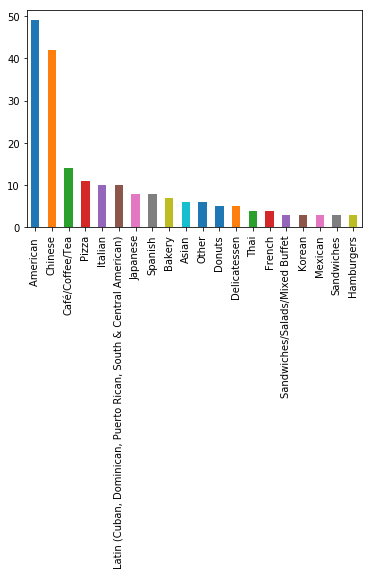

In [12]:
#Dictionary to store {cuisine:number of clean restuarants}
clean_cuisine = {}

#For each unique cuisine, add up the restaurants and keep count in the dictionary
for cuisine in Series(clean_store).unique():
    for store in clean_store.keys():
        if clean_store[store] == cuisine:
            if cuisine in clean_cuisine.keys():
                clean_cuisine[cuisine] += 1
            else: clean_cuisine[cuisine] = 1
        
Series(clean_cuisine).sort_values(ascending=False)[0:20].plot(kind='Bar')

# Q10

In [13]:
#Dictionary to store percentage of clean restaurants for each cuisine
clean_ratios = {}

#For each cuisine, calculate percentage of clean restaurants using info from Q9
for cuisine in cuisine_dt.keys():
    if cuisine_dt[cuisine] >= 20:
        if cuisine in clean_cuisine.keys():
            clean_ratio = float(clean_cuisine[cuisine])/cuisine_dt[cuisine]*100
            clean_ratios[cuisine] = clean_ratio
        else: clean_ratios[cuisine] = 0
            
print Series(clean_ratios).sort_values(ascending = False)[0:10]

Soul Food                        9.090909
Vietnamese/Cambodian/Malaysia    6.250000
Other                            5.825243
Continental                      4.761905
Barbecue                         4.761905
Soups & Sandwiches               4.761905
Asian                            4.109589
Chinese                          3.825137
Greek                            3.636364
Peruvian                         3.571429
dtype: float64


# Q11

In [14]:
#New dataframe with only these two columns
df_viola = df[['VIOLATION DESCRIPTION', 'BORO']]

#Remove rows where BORO is missing
df_viola = df_viola[df_viola['BORO']!='Missing']

#Create cross tab
v_table = pd.crosstab(df_viola['VIOLATION DESCRIPTION'], df_viola['BORO'])
v_table.idxmax()

#All boroughs seem to have the same most common violation

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# Q12

In [15]:
#Series to store frequency of each violation
df_violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()

#Function inputs: frequency of violation, violation decription, frequency series
#Function output: frequency as a percentage of total violation frequency
def normalize(f,violation, dfvf):
    return f/ float(dfvf.loc[violation])

#For each cell, apply the function
for boro in v_table.columns:
    for v in v_table.index.values:
        v_table.loc[v,boro] = normalize(v_table.loc[v,boro], v, df_violationFrequency)
        
v_table.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

# Q13

In [16]:
#Function to get the first 3 characters in a string
def getac(num):
    return num[:3]

#Map that function to all phone numbers
df['AREA CODE'] = df['PHONE'].map(getac)

#Counter for single zip codes
singlezip_count = 0

#Mask on each area code and check if there are multiple zip codes
for areacode in df['AREA CODE'].unique():
    df_area = df[df['AREA CODE']==areacode]
    
    if len(df_area['ZIPCODE'].unique()) == 1:
        singlezip_count += 1
    
singlezip_count

34

# Q14

In [17]:
#Return last word in string
def street_type(s):
    return s.split()[-1]

#Return all but the last word in string, as a string
def street_base(s):
    base_list = s.split()[:-1]
    base = ''    
    for word in base_list:
        base += word + ' '
    base = base.rstrip()
    return base


In [18]:
#Create columns
df['STREET BASE'] = df['STREET'].map(street_base)
df['STREET TYPE'] = df['STREET'].map(street_type)
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' + df['ZIPCODE']

#Create new dataframe
df_street = df[['STREET BASE', 'STREET TYPE', 'STREET BASE & ZIP']].drop_duplicates()

#Remove blank street base values
df_street = df_street[df_street['STREET BASE']!='']

#Merge on itself so misspellings show up double
df_smerge = df_street.merge(df_street,
                           left_on = 'STREET BASE & ZIP' ,
                           right_on = 'STREET BASE & ZIP' , 
                           suffixes = ['_1', '_2'])

#Mask to only show where there are mismatches
df_misspell =  df_smerge[df_smerge['STREET TYPE_1'] != df_smerge['STREET TYPE_2']]

#Cross tab shows sums of mismatches
df_streetcross = pd.crosstab(df_misspell['STREET TYPE_1'], df_misspell['STREET TYPE_2'])

print df_streetcross[['AVE', 'ST', 'RD', 'PL', 'BOULEARD','BULEVARD']].idxmax()


STREET TYPE_2
AVE         AVENUE
ST          STREET
RD            ROAD
PL           PLACE
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object
